# Tetons, WY, ROI#5

## Load *Streamlines* package

In [1]:
import streamlines

## Initiate *Streamlines* workflow

Choose the JSON parameters file we want to work with. The extension `.json` is automatically added.

In [2]:
JSON_parameters_file = 'Tetons_ROI5_smoothed'

Initialize streamline analysis.

In [3]:
sl = streamlines.run( parameters_file=JSON_parameters_file, \
                        do_geodata = False, \
                        do_preprocess = False, \
                        do_condition=True, \
                        do_trace = False, \
                        do_analysis=False, \
                        do_mapping=False, \
                        do_plot=False, \
                        do_display=True, \
                        do_save=False )


Wed 2018-12-12 15:34:56 JST+0900

**Initialization begin**
Loaded JSON parameters file "/Users/colinstark/Work/Streamlines/slm_app1/Tetons_ROI5_smoothed.json"
slm git:
[['commit dbf45629cc353bee2a227521b7fe6160b41c5ee6',
  'Author: Colin Stark',
  'Date:   Thu Sep 27 17:39:02 2018 +0900',
  '    Update nb, pdf']]
**Initialization end**



## Import DTM

In [4]:
sl.geodata.do()


**Geodata begin**
/Users/colinstark/Work/Streamlines/slm_app1
/Users/colinstark/Work/Streamlines/slm_data1 Tetons ROI5
Reading DTM from GeoTIFF file "/Users/colinstark/Work/Streamlines/slm_data1/Tetons/ROI5/Tetons_ROI5_res3m_filtersq15_fillsinks0p2.tif"
(510038.0, 3.0, 0.0, 4853770.0, 0.0, -3.0)
DTM size: 3403 x 1690 = 5,751,070 pixels
DTM pixel size: 3.0m
DTM origin:
  - bottom-left pixel center: [510038.00mE, 4848700.00mN]
  - bottom-left pixel corner: [510036.50mE, 4848698.50mN]
ROI pixel bounds:  [[0, 3402], [0, 1689]]
ROI pixel grid:  3403 x 1690 = 5,751,070 pixels
ROI pixel-edge boundaries (assuming pixel-as-area)
  - in pixel units: [x: 0.0<=>3403.0] , [y: 0.0<=>1690.0]
  - in meters:      [x: 0.0<=>10209.0] , [y: 0.0<=>5070.0]
Reading basins from GeoTIFF file "/Users/colinstark/Work/Streamlines/slm_data1/Tetons/ROI5/Tetons_ROI5_res3m_filtersq15_fillsinks0p2_basins.tif"
(510038.0, 3.0, 0.0, 4853770.0, 0.0, -3.0)


ERROR 1: NUMPY driver was compiled against GDAL 2.2, but the current library version is 2.3


Mask out all but basin numbers [196]
**Geodata end**



Recording figure "roi_shaded_relief"


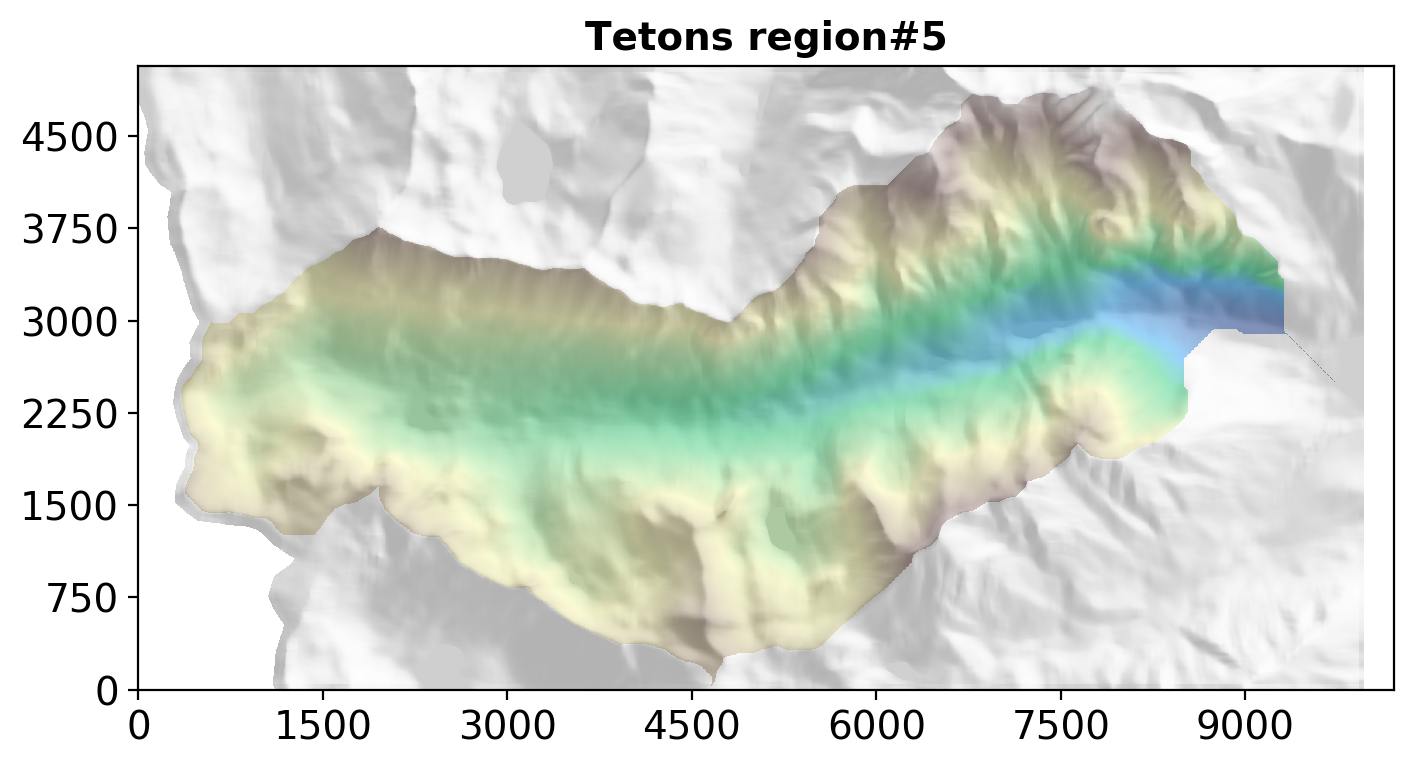

In [5]:
sl.plot.plot_roi_shaded_relief(interp_method='none')

## Preprocess DTM (fix loops etc)

In [6]:
%time sl.preprocess.do()


**Preprocess begin**
Precondition gradient vector field by fixing loops & blockages
Finding blockages...found 189...done
Finding and fixing loops...
...done
Fixing blockages...
...done
Mask out bad uv pixels...done
**Preprocess end**

CPU times: user 20.1 s, sys: 527 ms, total: 20.6 s
Wall time: 20.7 s


## Trace streamlines

In [7]:
%autosave 0
%time sl.trace.do()
%autosave 120

Autosave disabled

**Trace begin**
Integrating trajectories...
Generating seed points...shuffling...padding for 32 CL work items/group: 1000->1024...done
GPU/OpenCL device global memory limit for streamline trajectories: 3.6GB
GPU/OpenCL device memory required for streamline trajectories: 4MB => no need to chunkify
Total number of kernel instances: 1,024
Number of chunks = seed point array divisor: 1
Chunk size = number of kernel instances per chunk: 1,024
Downstream: downup=0 sgn(uv)=+1.0 chunk=0 seeds: 0+1000 => 1000
Seed point buffer size = 1000.0*8 bytes
0.0% 62.5% 100.0% 
Upstream:   downup=1 sgn(uv)=-1.0 chunk=0 seeds: 0+1000 => 1000
Seed point buffer size = 1000.0*8 bytes
0.0% 62.5% 100.0% 
Building streamlines compressed array
Streamlines actual array allocation:  size=2MB
Computing streamlines statistics
   downstream                           upstream                         
          min        mean          max       min        mean          max
l   36.263504  988.773926  

Autosaving every 120 seconds


In [8]:
import pandas as pd
ddf=pd.DataFrame(sl.trace.traj_stats_df.loc['downstream'].T)
udf=pd.DataFrame(sl.trace.traj_stats_df.loc['upstream'].T)
ddf.style.format("{:.3g}").set_properties(**{'font-size':'140%'})\
    .set_caption('Downstreamline statistics:')
udf.style.format("{:.3g}").set_properties(**{'font-size':'140%'})\
    .set_caption('Upstreamline statistics:')

Autosave disabled
Plotting all 1,000 down streamlines
Progress: 1%...2%...3%...4%...5%...6%...7%...8%...9%...10%...11%...12%...13%...14%...15%...16%...17%...18%...19%...20%...21%...22%...23%...24%...25%...26%...27%...28%...29%...30%...31%...32%...33%...34%...35%...36%...37%...38%...39%...40%...41%...42%...43%...44%...45%...46%...47%...48%...49%...50%...51%...52%...53%...54%...55%...56%...57%...58%...59%...60%...61%...62%...63%...64%...65%...66%...67%...68%...69%...70%...71%...72%...73%...74%...75%...76%...77%...78%...79%...80%...81%...82%...83%...84%...85%...86%...87%...88%...89%...90%...91%...92%...93%...94%...95%...96%...97%...98%...99%...100%
Plotting all 1,000 up streamlines
Progress: 1%...2%...3%...4%...5%...6%...7%...8%...9%...10%...11%...12%...13%...14%...15%...16%...17%...18%...19%...20%...21%...22%...23%...24%...25%...26%...27%...28%...29%...30%...31%...32%...33%...34%...35%...36%...37%...38%...39%...40%...41%...42%...43%...44%...45%...46%...47%...48%...49%...50%...51%...52%..

Autosaving every 120 seconds


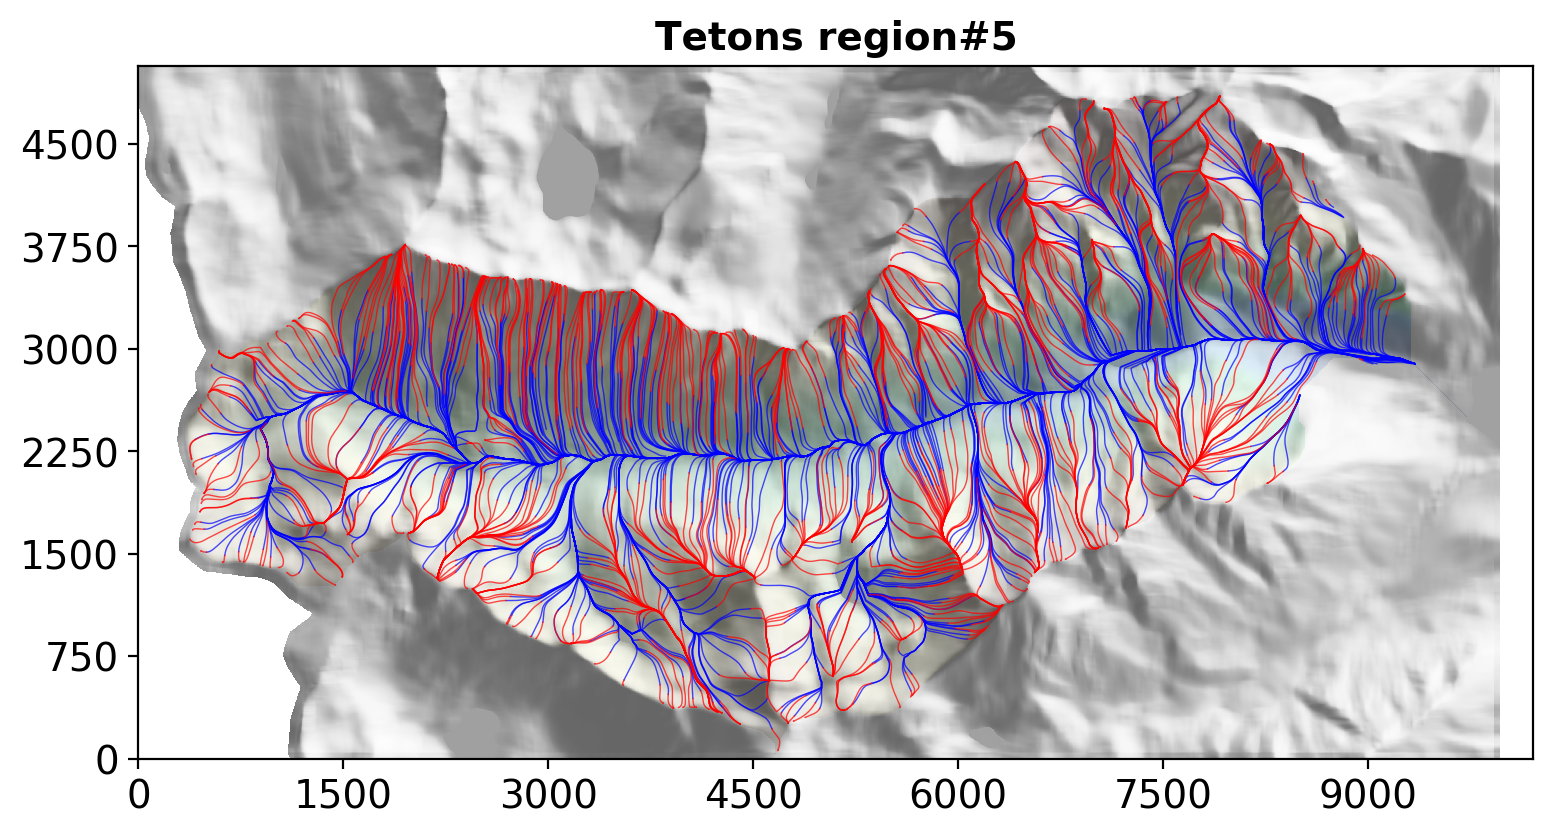

In [9]:
%autosave 0
sl.plot.plot_streamlines(window_size_factor=3)
%autosave 120

## Viz streamline flow concentrations

Recording figure "dsla"
Recording figure "dslt"


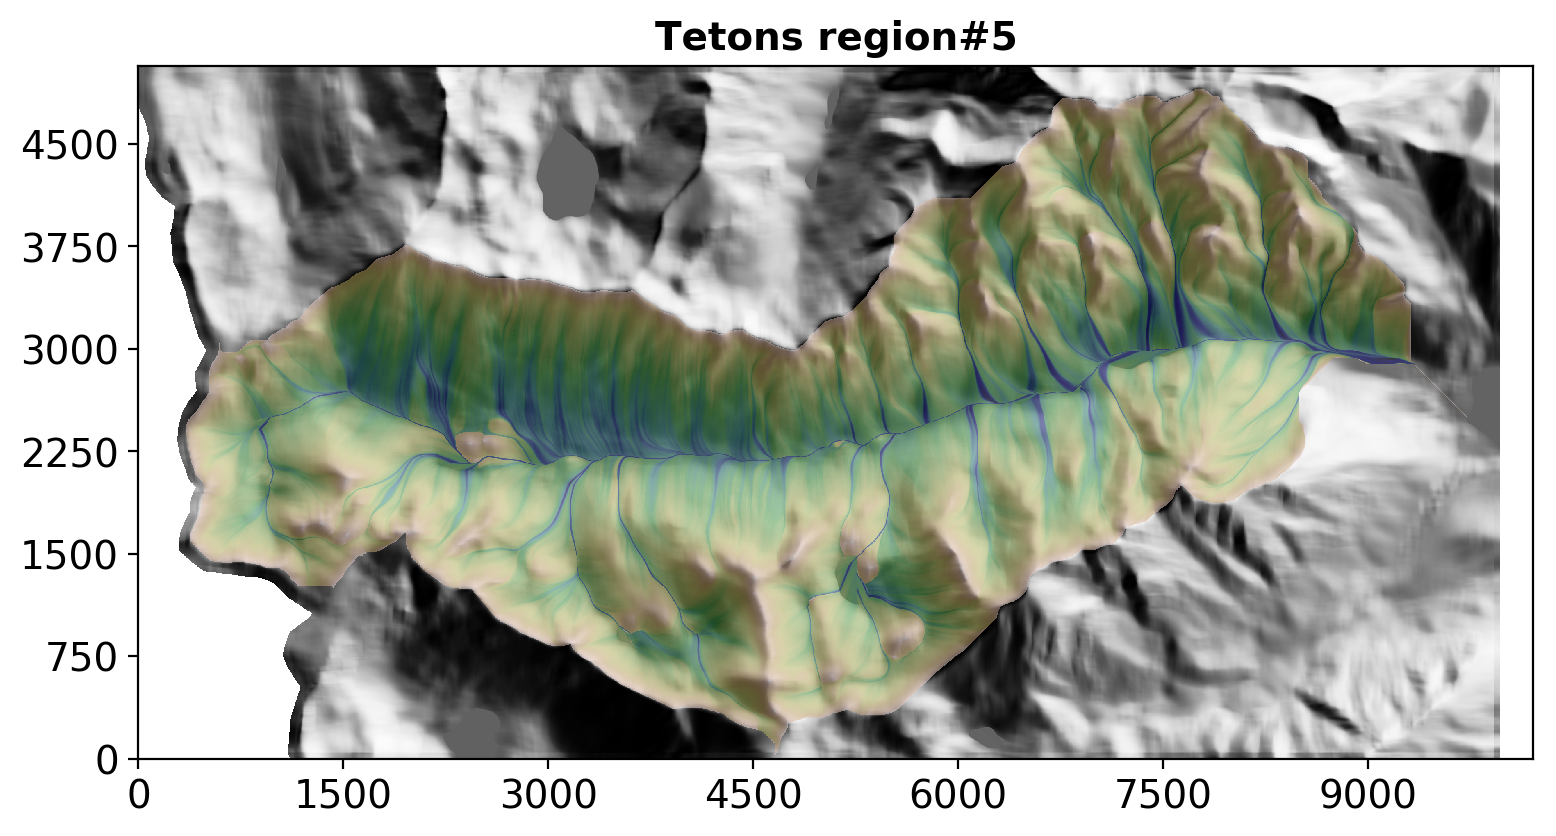

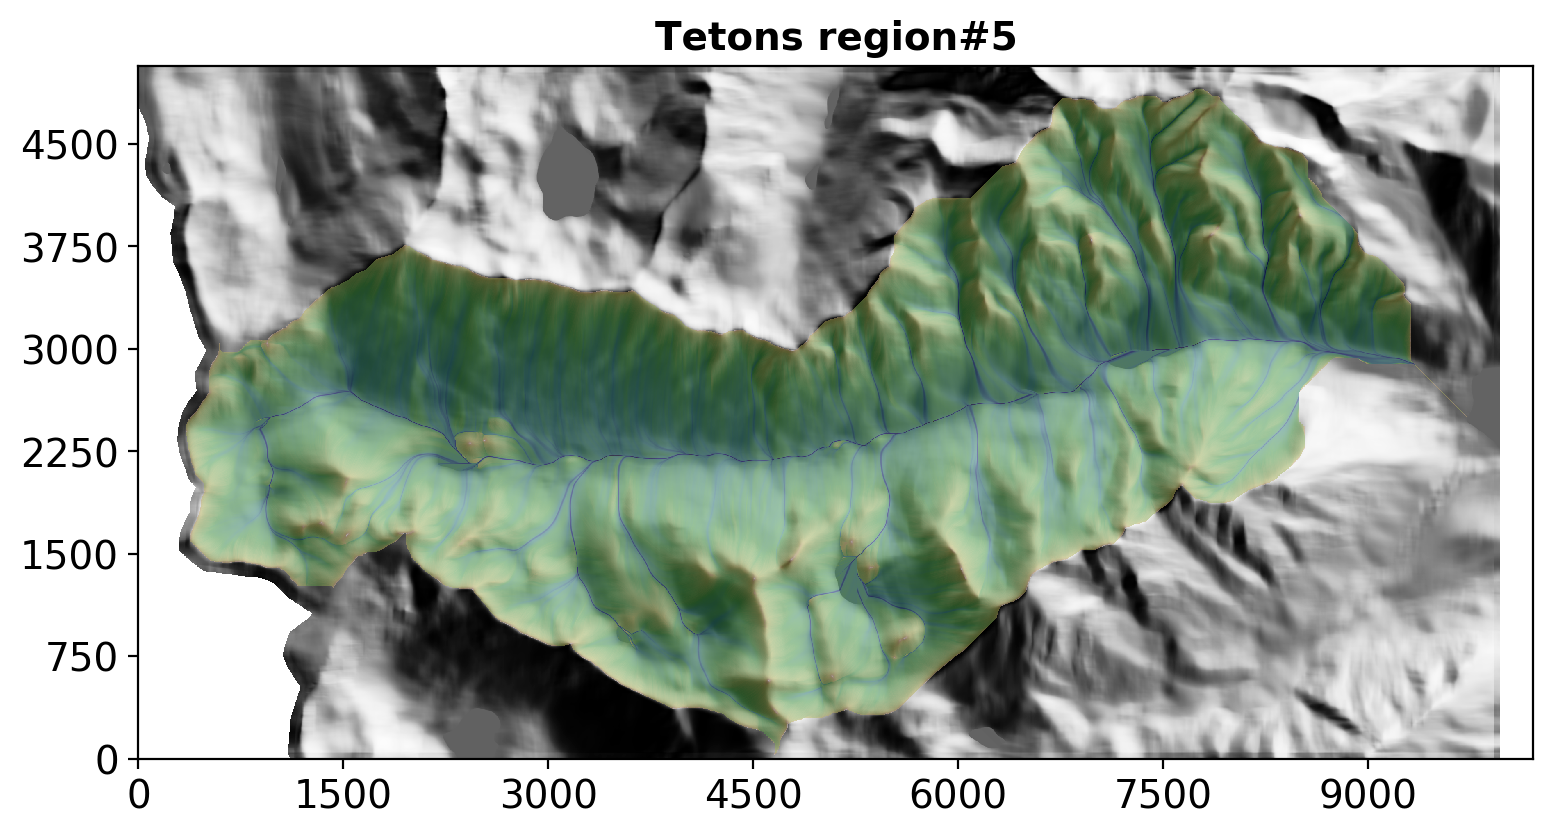

In [10]:
sl.plot.plot_flow_maps(window_size_factor=3)

## Analyze streamline distributions

In [11]:
# sl.analysis.do()

In [ ]:
# sl.plot.plot_distributions()

## Map channels, segments & hillslope lengths

In [ ]:
sl.analysis.search_cdf_min=0.9
sl.analysis.search_cdf_max=1

In [ ]:
sl.mapping.pass1()


**Pass#1 begin**
Channels...done
Connecting channel pixels...
...done
Thinning channels...skeletonizing...done
Mapping channel heads...
...done
Counting down channels...
...done
Flagging down channels...
...done
Labeling confluences...
...done
Flagging down channels...
...done
Flagging down channels...
...done
Flagging down channels...
...done
Segmenting channels...number of segments=83
...done
Linking hillslopes...
...done
Segmenting hillslopes...
...done
Subsegmenting left & right flanks...number of subsegments=159
...done


In [ ]:
sl.mapping.pass2()

In [ ]:
sl.mapping.pass3()

## Viz channels & segments

In [ ]:
sl.plot.plot_channels(window_size_factor=3)
sl.plot.plot_segments(window_size_factor=3)

In [ ]:
import matplotlib.pyplot as plt
h_midline_pts \
    = sl.geodata.roi_array[sl.mapping.midslope_array[2:-2,2:-2]].ravel()
h_all_pts = sl.geodata.roi_array[~np.isnan(sl.geodata.roi_array)].ravel()

In [ ]:
from scipy import stats
import numpy as np
h_midline_pdf = stats.gaussian_kde(h_midline_pts, bw_method='scott')
h_all_pdf = stats.gaussian_kde(h_all_pts, bw_method='scott')
h_array = np.linspace(2000,4000)
plt.plot(h_array,h_all_pdf.evaluate(points=h_array), label='all')
plt.plot(h_array,h_midline_pdf.evaluate(points=h_array), label='midline')
plt.legend()
plt.title('ROI5')
plt.xlabel('Elevation $h$  [m]')
plt.ylabel('Density $p(h)$  [m$^-1$]');

## Viz hillslope lengths

In [ ]:
sl.plot.plot_hsl(window_size_factor=3)

In [ ]:
sl.plot.plot_hsl_contoured(window_size_factor=3)

## Viz aspect, hillslope length

In [ ]:
sl.plot.plot_aspect(window_size_factor=3.25)

In [ ]:
sl.mapping.check_hsl_ns_disparity()

In [ ]:
sl.plot.plot_hsl_aspect_distribution(window_size_factor=3)

## Hillslope length stats

In [ ]:
sl.plot.plot_hsl_distributions()

In [ ]:
df = sl.mapping.hsl_stats_df
df[:30].style.format("{:.3g}").set_properties(**{'font-size':'140%'}) \
         .set_caption('Hillslope length statistics:')
df.mean()

## Export plots

In [ ]:
sl.plot.figs

In [ ]:
sl.save.do()